<a href="https://colab.research.google.com/github/2xazo/classification/blob/main/sentiment_analysis_for_amazon_review_nb_random_forest_v4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk import download
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


#Load Data

In [ ]:
data=pd.read_csv("Amazon-Product.csv")


In [ ]:
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [ ]:
data.tail(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
30836,US,6673031,RPAE9LSQGA9C9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,60,68,N,Y,Awesome for the price,Really good tablet for the money. Screen is gr...,2014-10-04,1
30837,US,35033638,R39R6KN5XDR2TO,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,108,140,N,N,It’s a shame because I really like the hardware,I picked up an Amazon Fire HD 7 on a whim and ...,2014-10-04,0
30838,US,25949529,R2LXIRO7MTFF4J,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,8,23,N,N,"and I loved it, after almost a yrear it start ...",I got the KindleFire 7 in October 10th deliver...,2014-10-04,1
30839,US,47064996,R3RR5OT9ENX11V,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,2,10,32,N,N,Video Ad is wrong?,Just wondering why the video ad says the table...,2014-10-04,0
30840,US,31454742,RH7AKI0TDF4MD,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,23,28,N,Y,"Wonderful, except","One step forward, one back. I owned the earli...",2014-10-04,1
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1
30845,US,7015231,R1MWVQUDBUADGE,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2,10,N,N,won't regret it,Am impressive piece of hardware for the $. No ...,2014-10-03,1


In [ ]:
data.shape

(30846, 16)

In [ ]:
data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,sentiment
count,3.084600e+04,30846.0,30846.000000,30846.00000,30846.000000,30846.000000
mean,2.471002e+07,2693241.0,4.336154,0.68641,0.895027,0.835343
std,1.611172e+07,0.0,1.120716,30.74337,32.356354,0.370876
min,1.134600e+04,2693241.0,1.000000,0.00000,0.000000,0.000000
25%,1.150637e+07,2693241.0,4.000000,0.00000,0.000000,1.000000
50%,2.294025e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
75%,4.008874e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.00000,3875.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1


In [ ]:
print("Original DataFrame columns:", data.columns)


Original DataFrame columns: Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30840 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30840 non-null  object
 1   customer_id        30840 non-null  int64 
 2   review_id          30840 non-null  object
 3   product_id         30840 non-null  object
 4   product_parent     30840 non-null  int64 
 5   product_title      30840 non-null  object
 6   product_category   30840 non-null  object
 7   star_rating        30840 non-null  int64 
 8   helpful_votes      30840 non-null  int64 
 9   total_votes        30840 non-null  int64 
 10  vine               30840 non-null  object
 11  verified_purchase  30840 non-null  object
 12  review_headline    30840 non-null  object
 13  review_body        30840 non-null  object
 14  review_date        30840 non-null  object
 15  sentiment          30840 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 5.0+ MB

In [ ]:
nltk.download('punkt_tab') # Downloading the missing punkt_tab data
nltk.download('punkt')  # For tokenization using word_tokenize
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # For WordNet lemmatizer data
nltk.download('stopwords')  # For stopwords

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    # Convert text to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming instead of lemmatization
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a single string
    return ' '.join(stemmed_tokens)

# Assuming 'data' is your DataFrame and 'review_body' is the column you want to clean
data['cleaned_review_body'] = data['review_body'].apply(preprocess_text)

In [ ]:
data['cleaned_review_body'].head(10)

,cleaned_review_body
0,great love
1,lot adsbr slow process speedbr occasion shut a...
2,excel unit versatil tablet besid competit pric...
3,bought amazon prime end buy gb one camera okay...
4,amazon product continu meet expect
5,good product like
6,kindl work well batteri goe dead quickli youd ...
7,realli enjoy new kindl easi use offer plenti u...
8,want perform perfectli everyth work great menu...
9,made well like look style


#Text Represnation


In [ ]:
X = data['cleaned_review_body']
y = data['sentiment']

In [ ]:
X

,cleaned_review_body
0,great love
1,lot adsbr slow process speedbr occasion shut a...
2,excel unit versatil tablet besid competit pric...
3,bought amazon prime end buy gb one camera okay...
4,amazon product continu meet expect
...,...
30841,videoidmopbgsrllyi purchas origin kindl fire s...
30842,im write review benefit experienc kindl fire u...
30843,purchas kindl grandma want simpl way video cha...
30844,bought tablet fire hd best buy day came hadnt ...


In [ ]:
y

,sentiment
0,1
1,0
2,1
3,1
4,1
...,...
30841,1
30842,1
30843,1
30844,1


In [ ]:
vectorizer = TfidfVectorizer()
X_v = vectorizer.fit_transform(X)


#Split data


In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X_v, y, test_size=0.2, random_state=42)


In [ ]:
print("Vectorized x_train shape:", X_train.shape)
print("Vectorized x_test shape:", x_test.shape)


Vectorized x_train shape: (24672, 14392)
Vectorized x_test shape: (6168, 14392)


#Naive Bayes Model

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred_nb = nb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.853923476005188


<ipython-input-55-67061132b159>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Negative', 'Positive'])
<ipython-input-55-67061132b159>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Negative', 'Positive'])


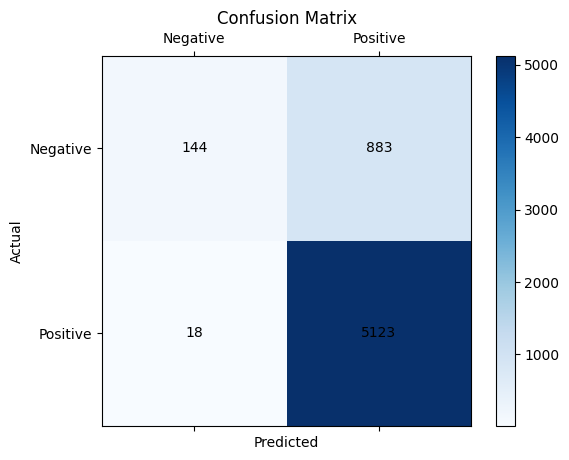

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding color bar
fig.colorbar(cax)

# Add annotations of the confusion matrix numbers
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# Set tick marks for grid
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])

plt.show()

In [ ]:
# Function to preprocess, vectorize text, and predict sentiment
def predict_sentiment(texts):
    # Define the mapping between numerical labels and sentiment strings
    label_to_sentiment = {0: 'Negative', 1: 'Positive'}  # Adjust if your labels are different
    # Preprocess the user input
    texts = [preprocess_text(text) for text in texts]
    # Transform the user input using the fitted TF-IDF vectorizer
    transformed_texts = vectorizer.transform(texts)
    # Making predictions using the Naive Bayes model
    predictions = nb_model.predict(transformed_texts)
    # Convert numerical predictions back to string labels manually
    predicted_labels = [label_to_sentiment[pred] for pred in predictions]
    for text, label in zip(texts, predicted_labels):
        print(f'Text: {text} --> Sentiment: {label}')

# Taking input from the user
user_input = input("Please enter your text: ")
predict_sentiment([user_input])

Please enter your text: it's very good, I liked it
Text: good like --> Sentiment: Positive


#Random Forset


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Accuracy: 0.876621271076524


#Confusion matrix

<ipython-input-70-67061132b159>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Negative', 'Positive'])
<ipython-input-70-67061132b159>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Negative', 'Positive'])


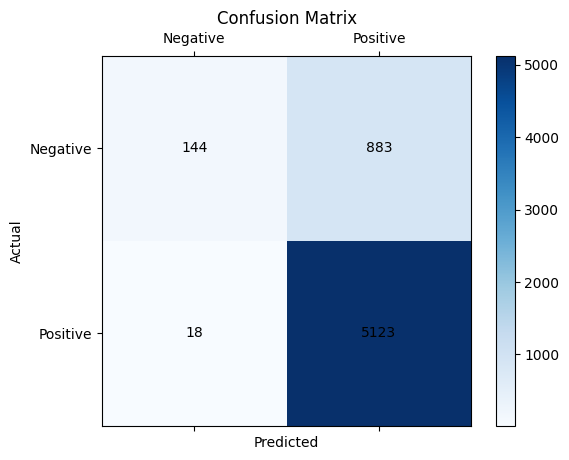

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding color bar
fig.colorbar(cax)

# Add annotations of the confusion matrix numbers
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# Set tick marks for grid
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])

plt.show()

In [ ]:
# Function to preprocess, vectorize text, and predict sentiment
def predict_sentiment(texts):
    # Define the mapping between numerical labels and sentiment strings
    label_to_sentiment = {0: 'Negative', 1: 'Positive'}  # Adjust if your labels are different
    # Preprocess the user input
    texts = [preprocess_text(text) for text in texts]
    # Transform the user input using the fitted TF-IDF vectorizer
    transformed_texts = vectorizer.transform(texts)
    # Making predictions using the Naive Bayes model
    predictions = rf_model.predict(transformed_texts)
    # Convert numerical predictions back to string labels manually
    predicted_labels = [label_to_sentiment[pred] for pred in predictions]
    for text, label in zip(texts, predicted_labels):
        print(f'Text: {text} --> Sentiment: {label}')

# Taking input from the user
user_input = input("Please enter your text: ")
predict_sentiment([user_input])

Please enter your text: I liked it, very great
Text: like great --> Sentiment: Positive
